In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")


In [6]:
df = pd.read_excel('data\Gestational Diabetic Dat Set.xlsx')

df.head(10)

,Case Number,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Family History,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes,Class Label(GDM /Non GDM)
0,1,22,2,1,NaN,55.0,0,0,0,0,102.0,69,NaN,12.0,0,0,0
1,2,26,2,1,NaN,53.0,0,0,0,0,101.0,63,NaN,12.4,0,0,0
2,3,29,1,0,NaN,50.0,0,0,0,0,118.0,79,NaN,14.3,0,0,0
3,4,28,2,1,NaN,51.0,0,0,0,0,99.0,70,NaN,15.0,0,0,0
4,5,21,2,1,NaN,52.0,0,0,0,0,116.0,65,NaN,15.0,0,0,0
5,6,29,2,1,NaN,51.0,0,0,0,0,98.0,63,NaN,15.2,0,0,0
6,7,26,2,1,NaN,51.0,0,0,0,0,94.0,68,NaN,15.0,0,0,0
7,8,27,1,0,NaN,52.0,0,0,0,0,116.0,63,NaN,12.0,0,0,0
8,9,26,1,0,NaN,57.0,0,0,0,0,108.0,62,NaN,14.0,0,0,0
9,10,21,2,1,NaN,52.0,0,0,0,0,98.0,78,NaN,13.0,0,0,0


In [7]:
# Check for missing values in each column
missing_values = df.isnull().sum()
# Display the count of missing values for each column
print(missing_values)


Case Number                           0
Age                                   0
No of Pregnancy                       0
Gestation in previous Pregnancy       0
BMI                                1081
HDL                                1001
Family History                        0
unexplained prenetal loss             0
Large Child or Birth Default          0
PCOS                                  0
Sys BP                             1705
Dia BP                                0
OGTT                                513
Hemoglobin                            0
Sedentary Lifestyle                   0
Prediabetes                           0
Class Label(GDM /Non GDM)             0
dtype: int64


In [9]:
# Filling missing values for numerical features
# Numerical columns for median imputation
numerical_columns = ['BMI', 'HDL', 'Sys BP', 'OGTT']
# Impute missing values with the median
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())
# Check if there are any remaining missing values
remaining_missing_values = df.isnull().sum()
# Display the columns with missing values and their counts (after imputation)
remaining_missing_values[remaining_missing_values > 0]


Series([], dtype: int64)

In [10]:
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print(missing_values)


Case Number                        0
Age                                0
No of Pregnancy                    0
Gestation in previous Pregnancy    0
BMI                                0
HDL                                0
Family History                     0
unexplained prenetal loss          0
Large Child or Birth Default       0
PCOS                               0
Sys BP                             0
Dia BP                             0
OGTT                               0
Hemoglobin                         0
Sedentary Lifestyle                0
Prediabetes                        0
Class Label(GDM /Non GDM)          0
dtype: int64


In [11]:
df['Class Label(GDM /Non GDM)'].value_counts()

Class Label(GDM /Non GDM)
0    2153
1    1372
Name: count, dtype: int64

In [12]:
# Define a function to handle outliers using IQR method
def handle_outliers_iqr(data, column):

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), data[column].median(), data[column])
    # Specify numerical columns for outlier handling
    numerical_columns = ['BMI', 'HDL', 'Sys BP', 'OGTT','Hemoglobin', 'DiaBP','Age']
    # Handle outliers for each numerical column
    for column in numerical_columns:
        handle_outliers_iqr(df, column)


In [13]:
 # Separate features (X) and target variable (y)
X = df.drop('Class Label(GDM /Non GDM)', axis=1)
y = df['Class Label(GDM /Non GDM)']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


In [15]:
from sklearn.preprocessing import MinMaxScaler
# Instantiate the MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the scaler on the training data
X_train_normalized = scaler.fit_transform(X_train)
# Transform the test data using the same scaler
X_test_normalized = scaler.transform(X_test)
# Convert the normalized arrays back to DataFrames (optional)

X_train_normalized = pd.DataFrame(X_train_normalized, columns=X.columns)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=X.columns)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Instantiate the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
# Fit the model to the normalized training data
rf_model.fit(X_train_normalized, y_train)
# Predictions on the test set
y_pred_rf = rf_model.predict(X_test_normalized)
# Evaluate the performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9659574468085106

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       448
           1       0.96      0.95      0.95       257

    accuracy                           0.97       705
   macro avg       0.96      0.96      0.96       705
weighted avg       0.97      0.97      0.97       705


Confusion Matrix:
[[437  11]
 [ 13 244]]


In [17]:
from sklearn.svm import SVC
# Instantiate the Support Vector Machine model

svm_model = SVC(random_state=42)
# Fit the model to the normalized training data
svm_model.fit(X_train_normalized, y_train)
# Predictions on the test set
y_pred_svm = svm_model.predict(X_test_normalized)
# Evaluate the performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.9659574468085106

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       448
           1       0.93      0.98      0.95       257

    accuracy                           0.97       705
   macro avg       0.96      0.97      0.96       705
weighted avg       0.97      0.97      0.97       705


Confusion Matrix:
[[429  19]
 [  5 252]]


In [18]:
from sklearn.neural_network import MLPClassifier
# Instantiate the Artificial Neural Network model
ann_model = MLPClassifier(random_state=42)
# Fit the model to the normalized training data
ann_model.fit(X_train_normalized, y_train)
# Predictions on the test set
y_pred_ann = ann_model.predict(X_test_normalized)
18
# Evaluate the performance
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print("ANN Accuracy:", accuracy_ann)
# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ann))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann))

ANN Accuracy: 0.9702127659574468

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       448
           1       0.95      0.97      0.96       257

    accuracy                           0.97       705
   macro avg       0.97      0.97      0.97       705
weighted avg       0.97      0.97      0.97       705


Confusion Matrix:
[[435  13]
 [  8 249]]


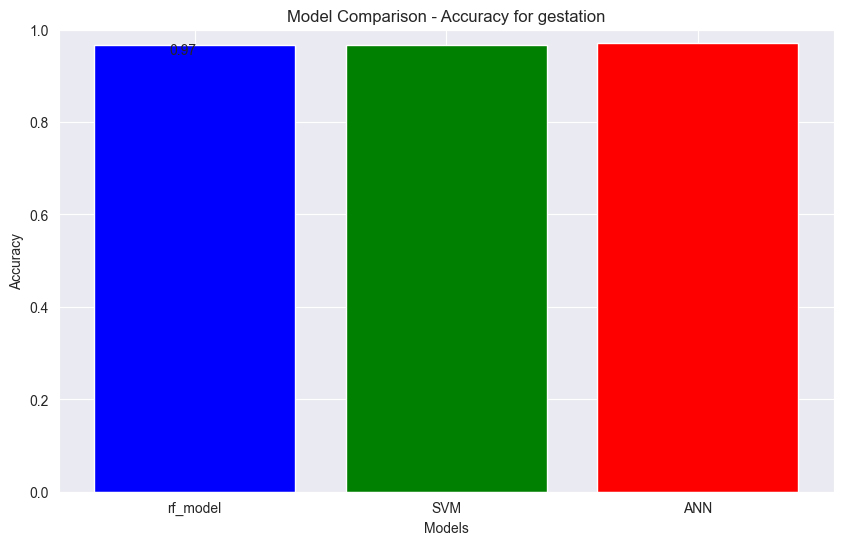

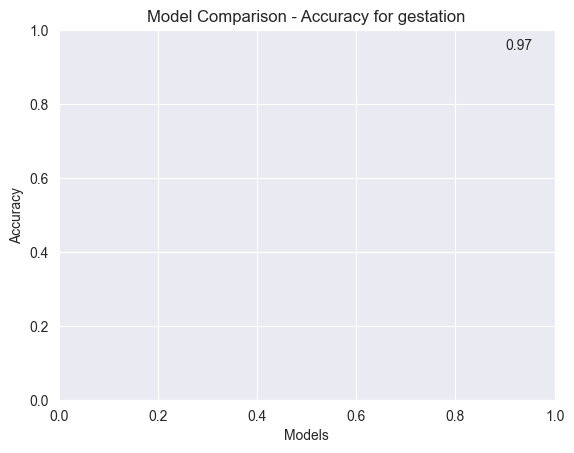

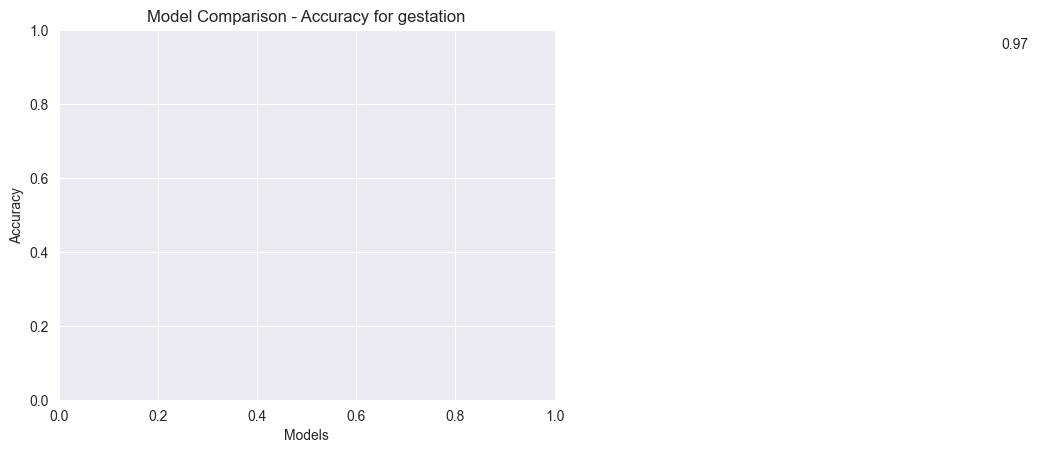

In [19]:
import matplotlib.pyplot as plt
import numpy as np
# List of model names
models = ['rf_model', 'SVM', 'ANN']
# List of accuracy scores for each model
accuracies = [accuracy_rf, accuracy_svm, accuracy_ann]
# Create a bar plot with values on top of the bars
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red'])
# Add values on top of the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() - 0.02, f'{accuracy:.2f}', fontsize=10)
    plt.title('Model Comparison - Accuracy for gestation')
    19
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1) # Set y-axis limit to the range of accuracy scores (0 to 1)
    plt.show()


In [20]:
 # Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [21]:
ann_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000,random_state=42)
ann_classifier.fit(X_train, y_train)


MLPClassifier(max_iter=1000, random_state=42)

In [22]:
# Predictions from Random Forest and ANN
rf_predictions = rf_classifier.predict(X_test)
ann_predictions = ann_classifier.predict(X_test)


In [23]:
# Combine predictions
hybrid_predictions = []
for rf_pred, ann_pred in zip(rf_predictions, ann_predictions):
# Combine predictions using a simple rule (e.g., voting)
    hybrid_pred = 1 if (rf_pred + ann_pred) >= 1 else 0
    hybrid_predictions.append(hybrid_pred)


In [24]:
# Evaluate accuracy
hybrid_accuracy1 = accuracy_score(y_test, hybrid_predictions)
print("Hybrid Model Accuracy1:", hybrid_accuracy1)


Hybrid Model Accuracy1: 0.9673758865248226


In [25]:
rf_weight = 0.6
ann_weight = 0.4

In [26]:
# Combine predictions using weighted average
hybrid_predictions = []
for rf_pred, ann_pred in zip(rf_predictions, ann_predictions):
    hybrid_pred = np.round(rf_pred * rf_weight + ann_pred * ann_weight)
    hybrid_predictions.append(hybrid_pred)


In [28]:
# Evaluate accuracy
hybrid_accuracy2 = accuracy_score(y_test, hybrid_predictions)
print("Hybrid Model Accuracy:", hybrid_accuracy2)


Hybrid Model Accuracy: 0.9659574468085106


In [30]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
# Generate predictions from base models for training meta-learner
rf_train_pred = cross_val_predict(rf_classifier, X_train, y_train, cv=5,method='predict_proba')[:, 1]
ann_train_pred = cross_val_predict(ann_classifier, X_train, y_train, cv=5, method='predict_proba')[:, 1]
# Stack the predictions horizontally
stacked_train_predictions = np.column_stack((rf_train_pred, ann_train_pred))
# Train meta-learner (Logistic Regression) on stacked predictions
meta_learner = LogisticRegression()
meta_learner.fit(stacked_train_predictions, y_train)
# Generate predictions from base models for testing
rf_test_pred = rf_classifier.predict_proba(X_test)[:, 1]
ann_test_pred = ann_classifier.predict_proba(X_test)[:, 1]
21
# Stack the test predictions horizontally
stacked_test_predictions = np.column_stack((rf_test_pred, ann_test_pred))
# Predict using meta-learner
stacked_predictions = meta_learner.predict(stacked_test_predictions)
# Evaluate accuracy
stacked_accuracy = accuracy_score(y_test, stacked_predictions)
print("Stacked Model Accuracy:", stacked_accuracy)


Stacked Model Accuracy: 0.9602836879432625


In [31]:
# Combine predictions using averaging (mean)
averaged_predictions = (rf_predictions + ann_predictions) / 2
# Round the averaged predictions to the nearest integer
averaged_predictions = np.round(averaged_predictions).astype(int)
# Evaluate accuracy
averaged_accuracy = accuracy_score(y_test, averaged_predictions)
print("Averaged Hybrid Model Accuracy:", averaged_accuracy)


Averaged Hybrid Model Accuracy: 0.9673758865248226


In [33]:
import pickle
file_name = 'rf_model.pkl'

pickle.dump(rf_model, open(file_name, 'wb'))

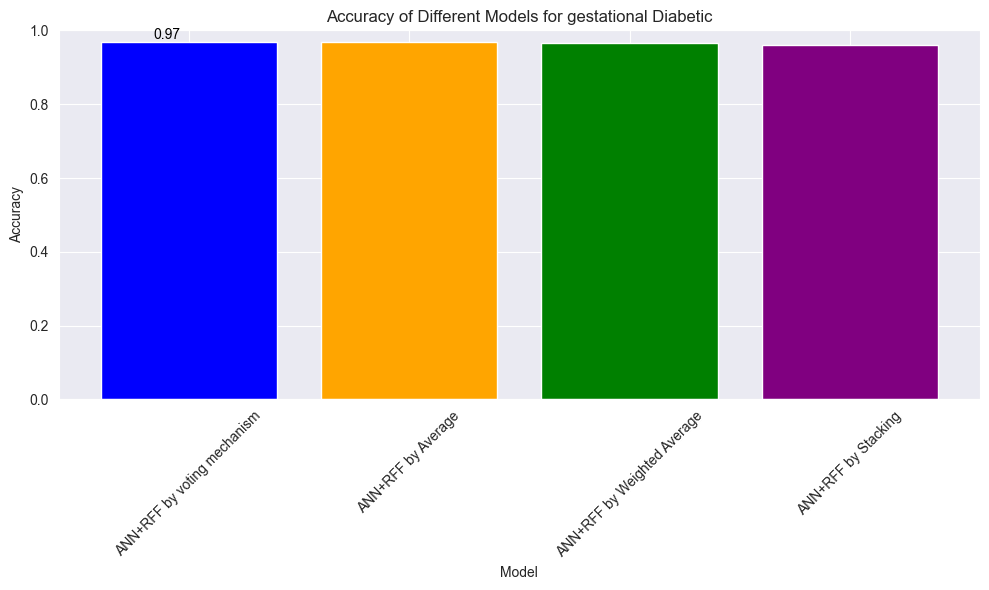

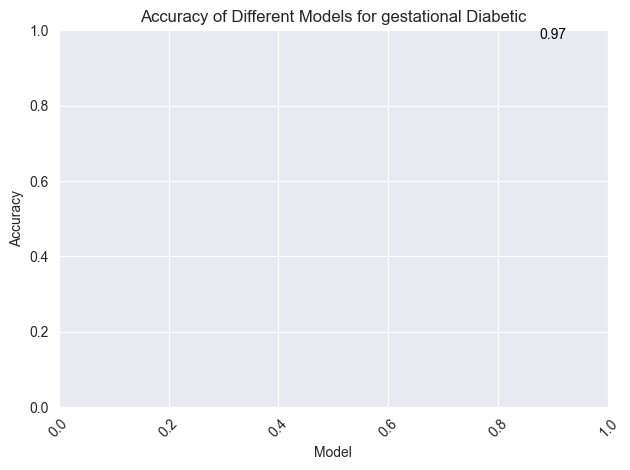

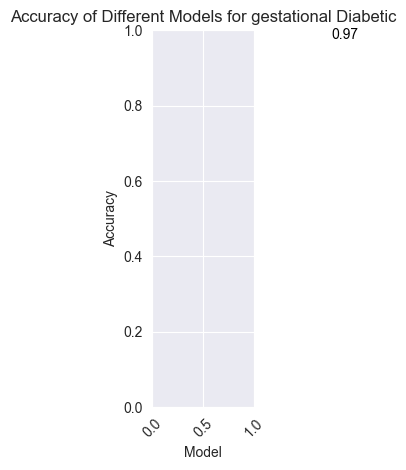

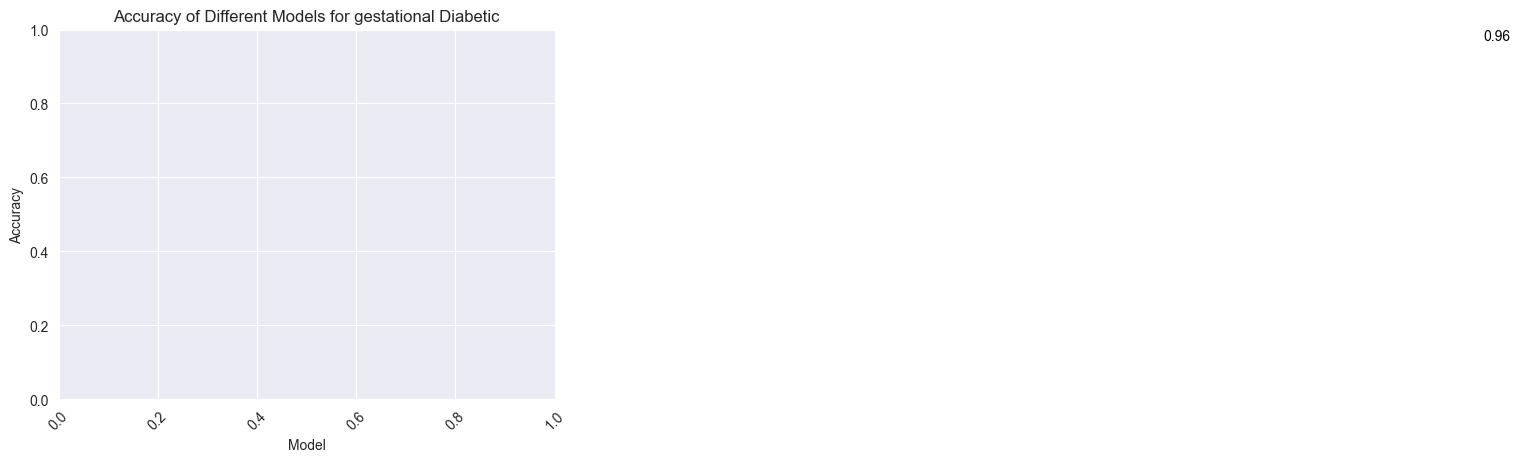

In [32]:
import matplotlib.pyplot as plt
# List of model names and their corresponding accuracies
models = ['ANN+RFF by voting mechanism','ANN+RFF by Average', 'ANN+RFF by Weighted Average', 'ANN+RFF by Stacking']
# List of accuracy scores for each model
accuracies = [hybrid_accuracy1, averaged_accuracy, hybrid_accuracy2, stacked_accuracy]
# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'purple'])
# Add accuracy values on top of the bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01,f'{acc:.2f}', ha='center', color='black', fontsize=10)
    plt.title('Accuracy of Different Models for gestational Diabetic')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1) # Set y-axis limits
    22
    plt.xticks(rotation=45)
    plt.tight_layout() # Adjust layout to prevent clipping of labels
    plt.show()


In [52]:
#Reading the data file for preclamsia
df = pd.read_excel('data\preeclampsia.xls')

In [53]:
df.head()

,Number,Age,Gravidity,Parity,GA Del,Fetuses,Marital,Level Ed,HIV stat,ARVs,...,RDS,ENND,SCBU ad,RDS.1,Prem,VLBwt,Sepsis,Cong mal,Discharg,Adverse
0,MP55708,39.0,8.0,7.0,29.86,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1,MP5504,31.0,3.0,2.0,28.00,0.0,NaN,NaN,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0,1
2,MP52062,24.0,4.0,3.0,29.42,0.0,NaN,NaN,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0,1
3,MP32046,30.0,4.0,3.0,30.00,0.0,NaN,NaN,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0,1
4,MP41254,19.0,1.0,0.0,31.28,0.0,NaN,NaN,2.0,NaN,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1


In [54]:
df= df.drop('Number', axis=1)

In [55]:
# Check for missing values in each column
missing_values = df.isnull().sum()
# Display the count of missing values for each column
print(missing_values)


Age           5
Gravidity     5
Parity        5
GA Del        5
Fetuses       5
             ..
VLBwt        62
Sepsis       62
Cong mal     62
Discharg      0
Adverse       0
Length: 67, dtype: int64


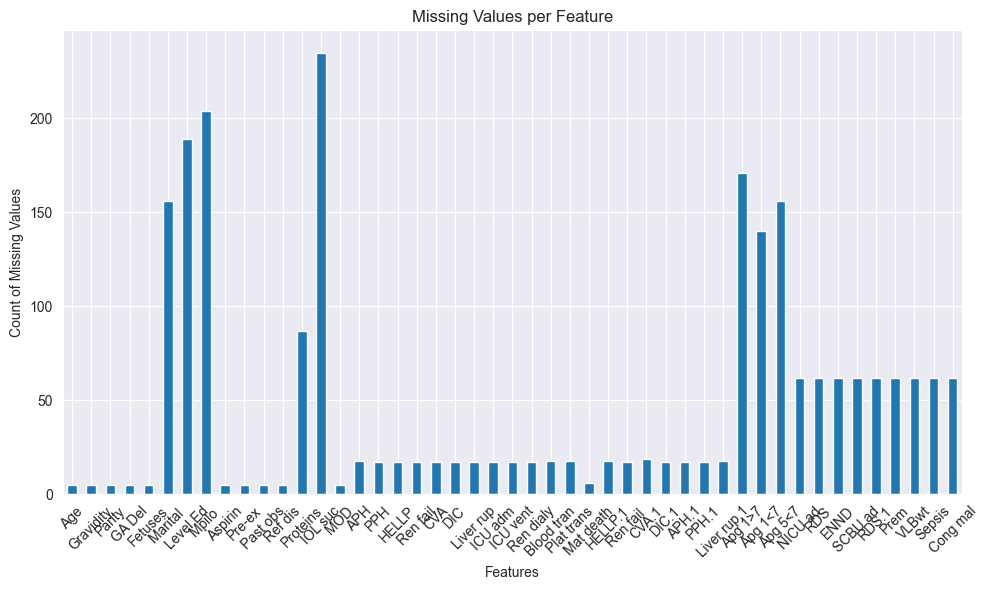

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
# Assuming your DataFrame is named 'df'
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0] # Filter features with␣ missing values
# Create a bar chart
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
26
plt.title('Missing Values per Feature')
plt.xlabel('Features')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45) # Rotate x-axis labels for readability
# Show the plot
plt.tight_layout()
plt.show()


In [49]:
 # Filling missing values for numerical features
# Numerical columns for median imputation
numerical_columns = ['HIV stat', 'ARVs', 'Ref cases', 'SBP pres', 'DBP pres','Reas', 'Plat co', 'Conv', 'Antihy','Mag sulp','Cortico',
'Reas.1','Compli','Ant USS', 'IOL']
# Impute missing values with the median
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())
# Check if there are any remaining missing values
remaining_missing_values = df.isnull().sum()
# Display the columns with missing values and their coun
remaining_missing_values[remaining_missing_values > 0]

Age              5
Gravidity        5
Parity           5
GA Del           5
Fetuses          5
Marital        156
Level Ed       189
Mpilo          204
Aspirin          5
Pre-ex           5
Past obs         5
Ref dis          5
Proteins        87
IOL suc        235
MOD              5
APH             18
PPH             17
HELLP           17
Ren fail        17
CVA             17
DIC             17
Liver rup       17
ICU adm         17
ICU vent        17
Ren dialy       17
Blood tran      18
Plat trans      18
Mat death        6
HELLP.1         18
Ren fail        17
CVA.1           19
DIC.1           17
APH.1           17
PPH.1           17
Liver rup.1     18
Apg 1>7        171
Apg 1<7        140
Apg 5<7        156
NICU ad         62
RDS             62
ENND            62
SCBU ad         62
RDS.1           62
Prem            62
VLBwt           62
Sepsis          62
Cong mal        62
dtype: int64

In [56]:
df.head(5)

,Age,Gravidity,Parity,GA Del,Fetuses,Marital,Level Ed,HIV stat,ARVs,Mpilo,...,RDS,ENND,SCBU ad,RDS.1,Prem,VLBwt,Sepsis,Cong mal,Discharg,Adverse
0,39.0,8.0,7.0,29.86,0.0,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1,31.0,3.0,2.0,28.00,0.0,NaN,NaN,0.0,0.0,NaN,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0,1
2,24.0,4.0,3.0,29.42,0.0,NaN,NaN,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0,1
3,30.0,4.0,3.0,30.00,0.0,NaN,NaN,0.0,0.0,NaN,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0,1
4,19.0,1.0,0.0,31.28,0.0,NaN,NaN,2.0,NaN,NaN,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1


In [75]:
feature_columns = ['Age',	'Gravidity',	'Parity',	'GA Del',	'Fetuses', 'HIV stat' ,'RDS',	'ENND',	'SCBU ad',	'RDS.1'	,'Prem'	,'VLBwt'	,'Sepsis', 'Cong mal' ,'Adverse']

new_df = df[feature_columns]

new_df.head()

,Age,Gravidity,Parity,GA Del,Fetuses,HIV stat,RDS,ENND,SCBU ad,RDS.1,Prem,VLBwt,Sepsis,Cong mal,Adverse
0,39.0,8.0,7.0,29.86,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,1
1,31.0,3.0,2.0,28.00,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1
2,24.0,4.0,3.0,29.42,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1
3,30.0,4.0,3.0,30.00,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1
4,19.0,1.0,0.0,31.28,0.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1


In [76]:
numerical_columns = feature_columns
# Impute missing values with the median
new_df[numerical_columns] = new_df[numerical_columns].fillna(new_df[numerical_columns].median())
# Check if there are any remaining missing values
remaining_missing_values = new_df.isnull().sum()
# Display the columns with missing values and their coun
remaining_missing_values[remaining_missing_values > 0]

Series([], dtype: int64)

In [77]:

 # Check for missing values in each column
missing_values = new_df.isnull().sum()
# Display the count of missing values for each column
print(missing_values)


Age          0
Gravidity    0
Parity       0
GA Del       0
Fetuses      0
HIV stat     0
RDS          0
ENND         0
SCBU ad      0
RDS.1        0
Prem         0
VLBwt        0
Sepsis       0
Cong mal     0
Adverse      0
dtype: int64


In [78]:
new_df.head()

,Age,Gravidity,Parity,GA Del,Fetuses,HIV stat,RDS,ENND,SCBU ad,RDS.1,Prem,VLBwt,Sepsis,Cong mal,Adverse
0,39.0,8.0,7.0,29.86,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,31.0,3.0,2.0,28.00,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1
2,24.0,4.0,3.0,29.42,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1
3,30.0,4.0,3.0,30.00,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1
4,19.0,1.0,0.0,31.28,0.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1


In [79]:
new_df['Adverse'].value_counts()


Adverse
1    135
0    108
Name: count, dtype: int64

In [80]:
# Separate features (X) and target variable (y)
X = new_df.drop('Adverse', axis=1)
y = new_df['Adverse']


In [81]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


In [82]:
from sklearn.preprocessing import MinMaxScaler
# Instantiate the MinMaxScaler
scaler = MinMaxScaler()
33
# Fit and transform the scaler on the training data
X_train_normalized = scaler.fit_transform(X_train)
# Transform the test data using the same scaler
X_test_normalized = scaler.transform(X_test)
# Convert the normalized arrays back to DataFrames (optional)
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X.columns)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=X.columns)

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
# Instantiate the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
# Fit the model to the normalized training data
rf_model.fit(X_train_normalized, y_train)
# Predictions on the test set
y_pred_rf = rf_model.predict(X_test_normalized)
# Evaluate the performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.7142857142857143

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        21
           1       0.75      0.75      0.75        28

    accuracy                           0.71        49
   macro avg       0.71      0.71      0.71        49
weighted avg       0.71      0.71      0.71        49


Confusion Matrix:
[[14  7]
 [ 7 21]]


In [84]:
from sklearn.neural_network import MLPClassifier
# Instantiate the Artificial Neural Network model
ann_model = MLPClassifier(random_state=42)
# Fit the model to the normalized training data
ann_model.fit(X_train_normalized, y_train)
# Predictions on the test set
y_pred_ann = ann_model.predict(X_test_normalized)
# Evaluate the performance
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print("ANN Accuracy:", accuracy_ann)
# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ann))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann))


ANN Accuracy: 0.8367346938775511

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        21
           1       0.92      0.79      0.85        28

    accuracy                           0.84        49
   macro avg       0.84      0.85      0.84        49
weighted avg       0.85      0.84      0.84        49


Confusion Matrix:
[[19  2]
 [ 6 22]]


In [73]:
from sklearn.svm import SVC
# Instantiate the Support Vector Machine model
svm_model = SVC(random_state=42)
# Fit the model to the normalized training data
svm_model.fit(X_train_normalized, y_train)
# Predictions on the test set
y_pred_svm = svm_model.predict(X_test_normalized)
# Evaluate the performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.7959183673469388

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.90      0.79        21
           1       0.91      0.71      0.80        28

    accuracy                           0.80        49
   macro avg       0.81      0.81      0.80        49
weighted avg       0.82      0.80      0.80        49


Confusion Matrix:
[[19  2]
 [ 8 20]]


In [85]:
import pickle
file_name = 'ann_model.pkl'

pickle.dump(ann_model, open(file_name, 'wb'))